In [800]:
import numpy as np
import scipy
from scipy.spatial import ConvexHull
from scipy.optimize import minimize

In [801]:
import matplotlib.pyplot as plt

In [802]:
def get_n_vec(n = 5):
    return np.array([(np.random.exponential(1), np.random.exponential(1), np.random.normal(0., 1.))for _ in range(n)])

In [803]:
vectors = get_n_vec(10)

In [804]:
def plot_vectors(vectors):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for vec in vectors:
        ax.plot([0,vec[0]], [0,vec[1]], [0,vec[2]])

In [805]:
def plot_vectors_and_hull(vectors, hull):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for vec in vectors:
        ax.plot([0,vec[0]], [0,vec[1]], [0,vec[2]])
    for i in hull.simplices:
        plt.plot(vectors[i,0], vectors[i,1], vectors[i,2], 'r-')

In [806]:
def plot_vectors_and_hull_and_alpha(vectors, hull, alpha):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot([0, alpha[0]], [0,alpha[1]], [0,alpha[2]], 'k--', linewidth= 4.5)
    for vec in vectors:
        ax.plot([0,vec[0]], [0,vec[1]], [0,vec[2]])
    for i in hull.simplices:
        plt.plot(vectors[i,0], vectors[i,1], vectors[i,2], 'r-')

In [863]:
def plot_hull_polylist_and_alpha(polylist, alpha):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    mean_pol_l = np.mean([np.linalg.norm(pol) for pol in polylist])
    if np.linalg.norm(alpha) < mean_pol_l:
        alpha_inc = alpha / np.linalg.norm(alpha) * mean_pol_l
        ax.plot([0, alpha_inc[0]], [0,alpha_inc[1]], [0,alpha_inc[2]], 'k--', linewidth= 4.5)
    else:
        ax.plot([0, alpha[0]], [0,alpha[1]], [0,alpha[2]], 'k--', linewidth= 4.5)
    for vec in polylist:
        ax.plot([0,vec[0]], [0,vec[1]], [0,vec[2]])

In [807]:
vectors

array([[ 0.5441157 ,  0.64673015, -1.04141339],
       [ 0.11664095,  0.05966234,  0.06807574],
       [ 1.63206117,  1.70491656, -1.86545671],
       [ 0.25169269,  0.38631541,  0.28342254],
       [ 0.5632959 ,  2.00288657,  0.01528091],
       [ 0.08671901,  0.09702094, -1.26876917],
       [ 0.05107917,  0.47344672,  0.47172466],
       [ 0.03185262,  0.5382196 , -0.19557281],
       [ 0.5711741 ,  3.81620942, -0.11734541],
       [ 1.3558141 ,  0.82032603, -0.36353183]])

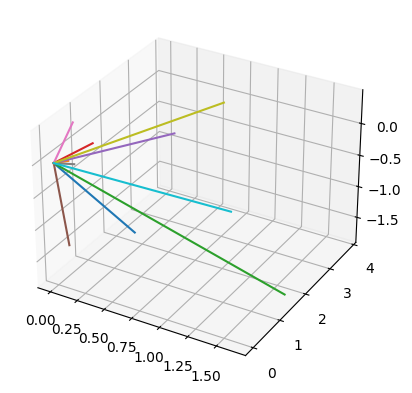

In [808]:
plot_vectors(vectors)

In [809]:
hull = ConvexHull(vectors)

In [810]:
print(hull.simplices)

[[6 8 7]
 [5 8 7]
 [5 8 2]
 [5 6 7]
 [9 5 2]
 [9 8 2]
 [9 6 8]
 [1 5 6]
 [1 9 5]
 [3 9 6]
 [3 1 6]
 [3 1 9]]


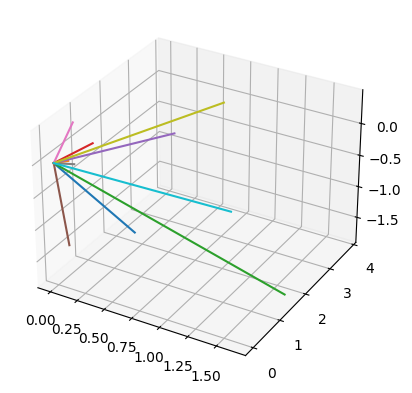

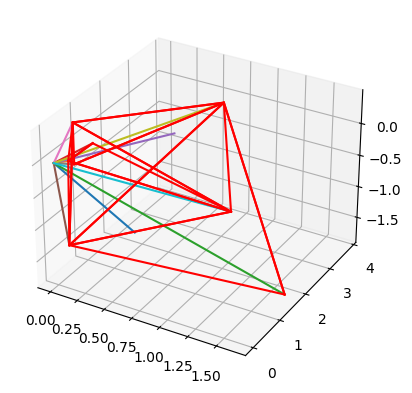

In [811]:
plot_vectors(vectors)
plot_vectors_and_hull(vectors, hull)

In [812]:
def kozinca(XJ, max_step = 100):
    alpha = []
    k = 0
    step = 0
    if len(XJ) < 2:
        return
    if len(alpha) == 0:
        alpha = XJ[0]
    
    min_ind = None
    found = False
    while (found == False) & (step < max_step):
        min_m = alpha @ XJ[0]
        min_ind = 0
        for indx, vect in  enumerate(XJ):
            comp = alpha @ vect
            #print(comp, min_m)
            #print("comparing: ",comp, min_m)
            #print()

            if (type(comp) != np.float64) | (type(min_m) != np.float64):
                print("comp =", comp, "min_m =", min_m, "alpha =", alpha)
            if comp < min_m:
                min_m = comp
                min_ind = indx
        if min_m <= 0:
            w = minimize(lambda k: np.linalg.norm((1 - k) * alpha + k * XJ[min_ind]), 1)
            k = w.x[0]
            alpha = (1 - k) * alpha + k * XJ[min_ind]
        else:
            found = True
        step += 1
        if step % 10000 == 0:
            print(step, np.linalg.norm(alpha), min_m)
    if not found:
        print("ended due to steps")
        print(min_m)

    return alpha, step

In [813]:
np.linalg.norm([3, 4])

5.0

In [814]:
vectors

array([[ 0.5441157 ,  0.64673015, -1.04141339],
       [ 0.11664095,  0.05966234,  0.06807574],
       [ 1.63206117,  1.70491656, -1.86545671],
       [ 0.25169269,  0.38631541,  0.28342254],
       [ 0.5632959 ,  2.00288657,  0.01528091],
       [ 0.08671901,  0.09702094, -1.26876917],
       [ 0.05107917,  0.47344672,  0.47172466],
       [ 0.03185262,  0.5382196 , -0.19557281],
       [ 0.5711741 ,  3.81620942, -0.11734541],
       [ 1.3558141 ,  0.82032603, -0.36353183]])

In [815]:
polylist = vectors[hull.vertices]

In [816]:
polylist

array([[ 0.11664095,  0.05966234,  0.06807574],
       [ 1.63206117,  1.70491656, -1.86545671],
       [ 0.25169269,  0.38631541,  0.28342254],
       [ 0.08671901,  0.09702094, -1.26876917],
       [ 0.05107917,  0.47344672,  0.47172466],
       [ 0.03185262,  0.5382196 , -0.19557281],
       [ 0.5711741 ,  3.81620942, -0.11734541],
       [ 1.3558141 ,  0.82032603, -0.36353183]])

In [817]:
alpha, step = kozinca(polylist)
step

2

In [818]:
def do_task(n, max_step = 10000000):
    vectors = get_n_vec(n)
    hull = ConvexHull(vectors)
    polylist = vectors[hull.vertices]
    print("Dots in convex hull:", len(polylist))
    alpha, step = kozinca(polylist, max_step)
    return vectors, hull, polylist, alpha, step

In [875]:
def do_task_and_show(n, max_step = 10000000):
    vectors, hull, polylist, alpha, step = do_task(n, max_step)
    print(step, alpha)
    plot_vectors_and_hull(vectors, hull)
    plot_hull_polylist_and_alpha(polylist, alpha)

Dots in convex hull: 7
3 [0.14910449 0.28146286 0.0452807 ]


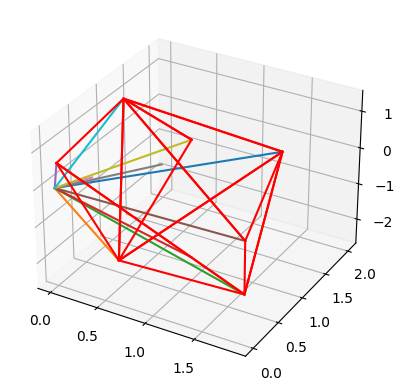

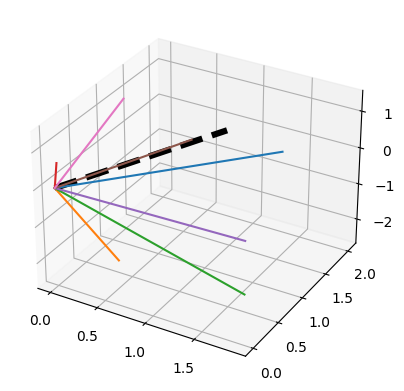

In [876]:
do_task_and_show(10)

Dots in convex hull: 14
4 [0.31021948 0.58499557 0.09269792]


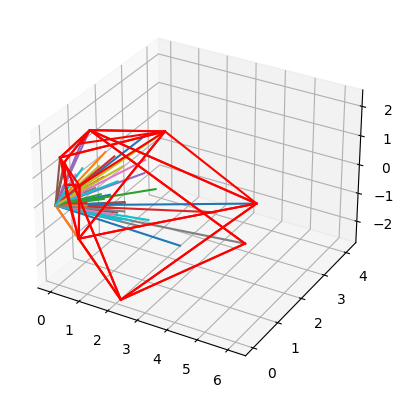

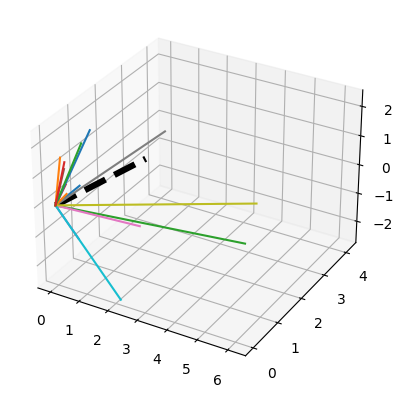

In [877]:
do_task_and_show(50)

Dots in convex hull: 26
1 [ 0.5363067   0.00719856 -0.01227574]


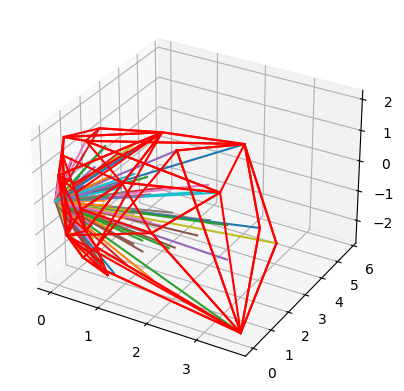

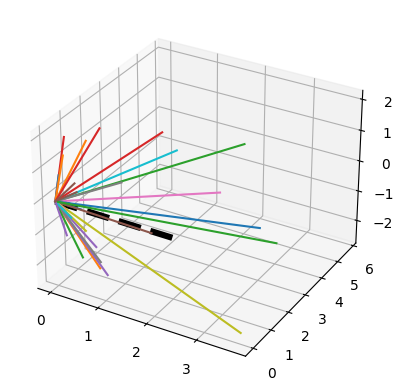

In [878]:
do_task_and_show(100)

Dots in convex hull: 41
26 [0.05080714 0.18493424 0.0006796 ]


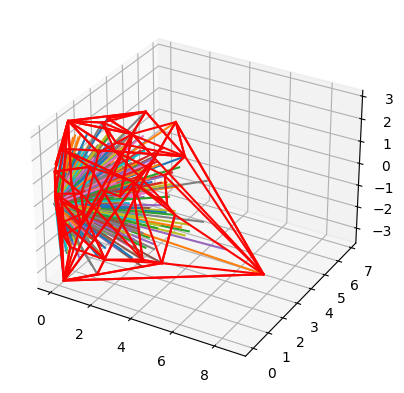

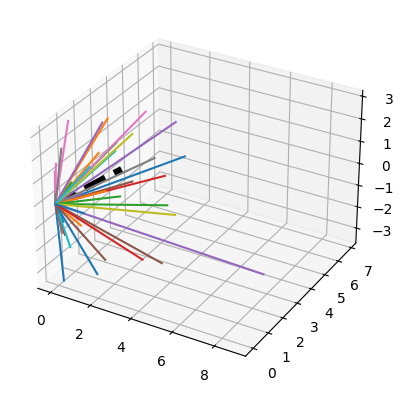

In [879]:
do_task_and_show(1000)

Dots in convex hull: 63
199 [ 0.03891704  0.09551219 -0.00185079]


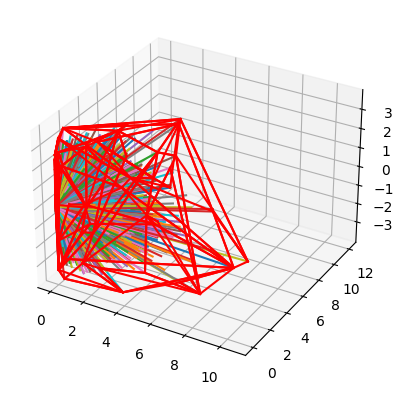

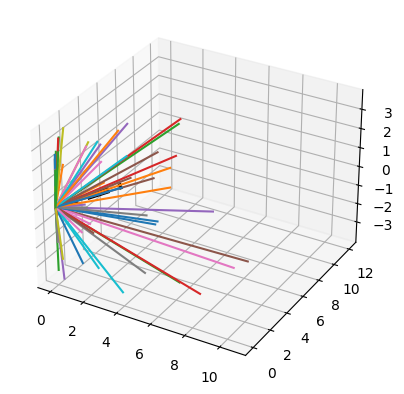

In [880]:
do_task_and_show(10000)